# Project: Binary Classification

Nama : Yayan Kurniawan

## Business Understanding
**Latar Belakang**

Startup DQLab mengalami tantangan dalam mempertahankan pelanggan berlangganan. Meskipun ribuan pelanggan telah di-follow up, jumlah pelanggan yang berhenti terus meningkat. Tim CRM mengalami tekanan dari pimpinan karena hasil kerja yang dianggap belum efektif. Dalam menghadapi permasalahan ini, muncul ide dari tim data science untuk membantu dengan membuat model klasifikasi otomatis untuk memprediksi apakah seorang pelanggan akan berhenti atau tetap berlangganan, berdasarkan data historis.


**Permasalahan**

Divisi CRM mengalami kesulitan dalam menentukan pelanggan mana yang perlu di-follow up karena:

- SDM terbatas untuk melakukan analisis manual terhadap semua pelanggan.

- Kurangnya pemahaman mendalam tentang faktor-faktor yang memengaruhi keputusan pelanggan untuk berhenti berlangganan.

Tanpa alat bantu yang efektif, waktu dan sumber daya menjadi tidak efisien karena follow up dilakukan kepada pelanggan yang tidak relevan.

**Tujuan Bisnis**

Meningkatkan efisiensi dan efektivitas kerja tim CRM dengan cara:

- Memfokuskan upaya follow up hanya pada pelanggan yang berisiko tinggi berhenti berlangganan.

- Mengurangi churn rate pelanggan.

- Meningkatkan kepuasan pimpinan terhadap performa tim CRM.

**Tujuan Analisis**

Membangun model binary classification menggunakan algoritma machine learning untuk:

- Memprediksi status keberlanjutan pelanggan berdasarkan data historis seperti tinggi badan, berat badan, usia, dan tarif (dalam konteks studi kasus ini diasumsikan sebagai fitur pelanggan).

- Menghasilkan label output (Status Rekomendasi: Ya/Tidak) yang merepresentasikan apakah pelanggan layak untuk di-follow up atau tidak.

## Data Understanding
Sebelum membuat model, kita perlu memahami variabel apa saja yang tersedia dan dapat digunakan.

- ID_Customer :	ID unik dari setiap pelanggan.
- Jenis_kelamin :Jenis kelamin pelanggan (Laki-laki / Perempuan).
- umur :	Usia pelanggan dalam tahun.
- membership_program :	Durasi (dalam bulan) pelanggan mengikuti program membership.
- using_reward :	Status apakah pelanggan menggunakan reward (Yes/No).
- pembayaran :	Metode pembayaran yang digunakan (Cash, Bank Transfer, Credit Card).
- Subscribe_brochure	:Status apakah pelanggan berlangganan brosur promosi (Yes/No).
- harga_per_bulan	: Biaya langganan per bulan dalam satuan rupiah.
- jumlah_harga_langganan:	Total biaya langganan selama periode membership.
- churn	: status apakah pelanggan berhenti berlangganan (Yes = churn, No = tidak churn).

## Data Preparation
Persiapan data yang dilakukan berupa pengubahan bentuk, pemisahan jumlah sample, maupun penambahan variabel tertentu.
1. Membaca dan Menampilkan Data  
2. Menghapus kolom ID_Customer dan Resampling
3. Memisahkan Kolom churn sebagai   
4. Tipe Data dan Statistik Deskriptif Setiap Kolom  
5. Membuang Kolom yang Tidak Diperluka
6. Mengubah Data Kategorik Menjadi Data Numerik  
7. Dataset untuk Feature Matrix sebagai   
8. Dataset Training dan Testing

## Modeling
Rangkaian Proses Binary Classification.

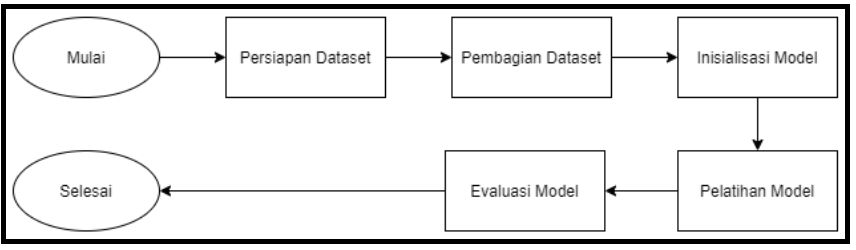


1. Menyiapkan Dataset (X dan y)

  Memisahkan data menjadi:

  - X: Sekumpulan fitur yang menggambarkan karakteristik pelanggan.

  - y: Label target berupa status churn (Yes/No atau 1/0).

2. Membagi Dataset (Training dan Testing)

  Dataset dibagi menjadi dua bagian:

  - Data Training: Digunakan untuk melatih model.

  - Data Testing: Digunakan untuk mengukur performa model terhadap data yang belum pernah dilihat sebelumnya.

 - Proporsi umum: 80% training, 20% testing.


3. Inisialisasi Model

  Menentukan algoritma klasifikasi yang akan digunakan.

  Pada tahap ini, digunakan dua model:

  - Decision Tree Classifier

  - Random Forest Classifier


4. Melatih Model
  - Memberikan data training kepada model agar mempelajari pola dari data.

  - Model belajar mengenali hubungan antara fitur (X) dan label (y).

5. Melakukan Prediksi
  - Setelah dilatih, model digunakan untuk memprediksi data testing.

  - Hasil prediksi akan dibandingkan dengan label asli (ground truth).

6. Evaluasi Model
  Performa model diukur menggunakan metrik:

  - Akurasi: Persentase prediksi yang benar dibanding total data.

  - Model dengan akurasi lebih tinggi akan dipertimbangkan sebagai model terbaik.



## Evaluation
Untuk mengukur performa hasil prediksi model, dapat dihitung akurasi dari model hasil pelatihan.

Proses perhitungan dapat dilakukan melalui langkah-langkah berikut.

- Lakukan prediksi pada sekumpulan data X (baik milik dataset training ataupun dataset testing) untuk menghasilkan list hasil prediksi
- Bandingkan hasil prediksi dengan label aktual yang dimiliki oleh setiap data.
- Hitung jumlah prediksi yang sama dengan label aktualnya.
- Bagi hasil perhitungan dengan total data X untuk menghasilkan akurasi.

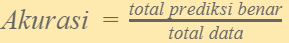





## Deployment
Menyampaikan hasil analisis ke stakeholder atau mengimplementasikan model ke sistem produksi.

- Model yang sudah dilatih dapat digunakan oleh tim CRM untuk memprioritaskan follow-up pelanggan.

- Prediksi churn bisa diintegrasikan ke sistem CRM agar proses bisnis lebih efisien.

## Data Data Preparation

### Import Package

In [22]:
#meng-import library pandas, library ini dapat kita gunakan untuk membaca data dalam format xlsx ataupun csv
import pandas as pd

#mengimport class LabelEncoder untuk mengubah atribut dengan dua kemungkinan nilai (binary)
from sklearn.preprocessing import LabelEncoder

#library yang akan kita gunakan untuk membagi dataset
from sklearn.model_selection import train_test_split

#untuk melakukan proses klasifikasi menggunakan algoritma DecisionTree kita dapat mengimport object 'DecisionTreeClassifier' pada modul 'tree' milik library scikit-learn
from sklearn.tree import DecisionTreeClassifier

#meng-import fungsi untuk menghitung akurasi pada library scikit-learn
from sklearn.metrics import accuracy_score

#scikit-learn, tepatnya pada modul ensemble.
from sklearn.ensemble import RandomForestClassifier

### Membaca dan Menampilkan Data

In [3]:
# mengatur tampilan output agar maksimal 20 kolom ditampilkan saat mencetak DataFrame
pd.set_option('display.max_column', 20)

#men-load file churn_analysis_train.xlsx sebagai pandas data frame untuk mempermudah proses pengolahan data
df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/cth_churn_analysis_train.xlsx')

#perintah untuk menampilkan 5 data pertama
print(df.head(5))

  ID_Customer Jenis_kelamin  umur  membership_program using_reward  \
0   1005-CTMP     Perempuan    41                  36           No   
1   1007-STSJ     Laki-laki    27                  36          Yes   
2   1012-NCGH     Laki-laki    45                  36           No   
3   1014-WWBN     Perempuan    33                  12           No   
4   1024-HYUA     Perempuan    38                  12           No   

      pembayaran Subscribe_brochure  harga_per_bulan  jumlah_harga_langganan  \
0           Cash                 No            10000                  360000   
1  Bank Transfer              Email            10000                  360000   
2           Cash                 No            10000                  360000   
3  Bank Transfer                Yes            10000                  120000   
4           Cash                 No            10000                  120000   

  churn  
0   Yes  
1   Yes  
2    No  
3    No  
4    No  


### Menghapus kolom ID_Customer dan Resampling

In [4]:
#menghilangkan kolom 'ID_Customer' dari data frame dikarenakan kolom ini tidak relevan untuk dijadikan input dalam tugas klasifikasi (ID customer tidak mempengaruhi apakah customer akan lanjut berlangganan atau tidak
df.drop('ID_Customer', axis=1, inplace=True)
print(df['churn'].value_counts())

churn
Yes    262
No     237
Name: count, dtype: int64


### Memisahkan Kolom churn sebagai y

In [5]:
#menyimpan kolom 'churn' sebagai list ke dalam variabel y
y = df.pop('churn').to_list()

#mengubah nilai 'Yes' menjadi 1 dan nilai 'No' menjadi 0 agar sesuai dengan format yang sebelumnya telah kita bahas
y = [1 if label == 'Yes' else 0 for label in y]
print(df.head())

  Jenis_kelamin  umur  membership_program using_reward     pembayaran  \
0     Perempuan    41                  36           No           Cash   
1     Laki-laki    27                  36          Yes  Bank Transfer   
2     Laki-laki    45                  36           No           Cash   
3     Perempuan    33                  12           No  Bank Transfer   
4     Perempuan    38                  12           No           Cash   

  Subscribe_brochure  harga_per_bulan  jumlah_harga_langganan  
0                 No            10000                  360000  
1              Email            10000                  360000  
2                 No            10000                  360000  
3                Yes            10000                  120000  
4                 No            10000                  120000  


### Tipe Data dan Statistik Deskriptif Setiap Kolom

In [6]:
#memeriksa tipe data dari setiap kolom
print('Tipe data setiap kolom:')
print('-----------------------')
df.info()

Tipe data setiap kolom:
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Jenis_kelamin           499 non-null    object
 1   umur                    499 non-null    int64 
 2   membership_program      499 non-null    int64 
 3   using_reward            499 non-null    object
 4   pembayaran              499 non-null    object
 5   Subscribe_brochure      499 non-null    object
 6   harga_per_bulan         499 non-null    int64 
 7   jumlah_harga_langganan  499 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 31.3+ KB


In [7]:
#lakukan pengecekan untuk kolom dengan tipe data 'object' (kategorikal)
print('\nKolom dengan tipe data object (kategorikal):')
print('--------------------------------------------')
for col in df.select_dtypes(include=['object']):
	print(df[col].value_counts())
	print("===============================")


Kolom dengan tipe data object (kategorikal):
--------------------------------------------
Jenis_kelamin
Laki-laki    263
Perempuan    236
Name: count, dtype: int64
using_reward
No     261
Yes    238
Name: count, dtype: int64
pembayaran
Bank Transfer    195
Cash             156
Credit Card      148
Name: count, dtype: int64
Subscribe_brochure
Yes      172
Email    167
No       160
Name: count, dtype: int64


In [8]:
#statistik deskriptif dari setiap kolom
print('\nStatistik deskriptif dari setiap kolom:')
print('---------------------------------------')
print(df.describe())


Statistik deskriptif dari setiap kolom:
---------------------------------------
             umur  membership_program  harga_per_bulan  jumlah_harga_langganan
count  499.000000          499.000000            499.0              499.000000
mean    34.981964           19.719439          10000.0           197194.388778
std      6.056103           11.470297              0.0           114702.970206
min     25.000000            6.000000          10000.0            60000.000000
25%     30.000000           12.000000          10000.0           120000.000000
50%     35.000000           24.000000          10000.0           240000.000000
75%     40.000000           36.000000          10000.0           360000.000000
max     45.000000           36.000000          10000.0           360000.000000


### Membuang Kolom yang Tidak Diperlukan

In [9]:
#membuang kolom 'harga_per_bulan'
df.drop('harga_per_bulan', axis=1, inplace=True)

#membuang kolom 'jumlah_harga_langganan'
df.drop('jumlah_harga_langganan', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Jenis_kelamin       499 non-null    object
 1   umur                499 non-null    int64 
 2   membership_program  499 non-null    int64 
 3   using_reward        499 non-null    object
 4   pembayaran          499 non-null    object
 5   Subscribe_brochure  499 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.5+ KB


### Mengubah Data Kategorik Menjadi Data Numerik

In [12]:
#menyiapkan dictionary untuk menyimpan seluruh LabelEncoder untuk setiap atribut kategorikal yang bersifat biner
labelers = {}

#untuk setiap kolom dengan tipe data 'object' (kategorikal)
column_categorical_non_binary = []
for col in df.select_dtypes(include=['object']):
	#saat jumlah nilai unik dari suatu kolom sama dengan dua
	#atau dengan kata lain kolom bersifat biner
	if len(df[col].unique()) == 2:
		#buat objek LabelEncoder baru untuk kolom dan tampung dalam
		#dictionary labelers
		labelers[col] = LabelEncoder()
		#meminta objek LabelEncoder untuk mempelajari dan
		#mentransformasikan kolom
		df[col] = labelers[col].fit_transform(df[col])
	#untuk kolom bersifat non-biner
	else:
		#tambahkan nama kolom ke dalam array yang telah disiapkan
		column_categorical_non_binary.append(col)
print(df.head())

df = pd.get_dummies(df, columns= column_categorical_non_binary)
print(df.head())

   Jenis_kelamin  umur  membership_program  using_reward  \
0              1    41                  36             0   
1              0    27                  36             1   
2              0    45                  36             0   
3              1    33                  12             0   
4              1    38                  12             0   

   pembayaran_Bank Transfer  pembayaran_Cash  pembayaran_Credit Card  \
0                     False             True                   False   
1                      True            False                   False   
2                     False             True                   False   
3                      True            False                   False   
4                     False             True                   False   

   Subscribe_brochure_Email  Subscribe_brochure_No  Subscribe_brochure_Yes  
0                     False                   True                   False  
1                      True                  False  

### Dataset untuk Feature Matrix sebagai X

In [13]:
#merepresentasikan seluruh kolom dalam df sebagai matrik dan menampungnya dalam variabel X.
X = df.to_numpy()

#menampilkan informasi dimensi dari variabel X
print("Dimensi dari variabel X:",X.shape)

Dimensi dari variabel X: (499, 10)


### Dataset Training dan Testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=23)

print("Dimensi data X mula-mula:", X.shape)
print("Dimensi data y mula-mula:",len(y),"\n")

print("Dimensi data X train:", X_train.shape)
print("Dimensi data y train:", len(y_train),"\n")

print("Dimensi data X test:", X_test.shape)
print("Dimensi data y test:", len(y_test),"\n")

Dimensi data X mula-mula: (499, 10)
Dimensi data y mula-mula: 499 

Dimensi data X train: (449, 10)
Dimensi data y train: 449 

Dimensi data X test: (50, 10)
Dimensi data y test: 50 



## Model Decision Tree

### Training Model

In [17]:
#potongan kode ini dapat kita gunakan untuk menginisialisasi model dengan default parameter yang telah disediakan oleh library perhatikan bahwa parameter random_state hanya digunakan untuk reproducibility seperti layaknya pada fungsi train_test_split
model = DecisionTreeClassifier(random_state=57)

#meminta model untuk melatih dirinya menggunakan data X_train dan y_train yang telah disiapkan
print("Memulai melatih 'model'.")
model.fit(X_train, y_train)
print("Selesai melatih 'model'.")

Memulai melatih 'model'.
Selesai melatih 'model'.


### Menggunakan Model untuk Prediksi Data Baru

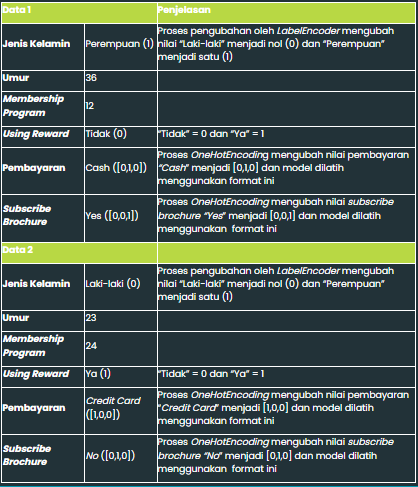

In [18]:
X_new = [
	[1, 36, 12, 0, 0, 1, 0, 0, 0, 1], # <= data pertama
	[0, 23, 24, 1, 1, 0, 0, 0, 1, 0]  # <= data kedua
]

#melakukan prediksi pada data dalam variabel X_new
y_new_pred = model.predict(X_new)
print(y_new_pred)

[1 0]


### Evaluasi Model Klasifikasi


In [20]:
#melakukan prediksi terhadap data latih dan menampung
#label hasil prediksi dalam variabel y_pred
y_pred = model.predict(X_train)
score = accuracy_score(y_train, y_pred)
print("Skor akurasi untuk data latih:", score)

#melakukan prediksi terhadap data testing dan menampung
#label hasil prediksi dalam variabel y_pred
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("Skor akurasi untuk data testing:", score)

Skor akurasi untuk data latih: 0.9710467706013363
Skor akurasi untuk data testing: 0.4


### Analisis Hasil Akurasi Decision Tree
Output Model:

- Akurasi data latih: 97.10%

- Akurasi data testing: 40.00%

### Parameterisasi Model Decision Tree

In [21]:
#mendefinisikan nilai dari parameter 'min_samples_split' yang akan dicobakan
min_samples_split_search = [2,4,8,16,32,64]

#mendefinisikan nilai dari parameter 'max_depth' yang akan dicobakan
max_depth_search = [4,8,16,32,64,128]

#mendefinisikan variabel untuk menyimpan skor terbaik dari setiap model dengan parameter yang berbeda
max_score = 0

#mendefinisikan variabel untuk menyimpan model terbaik.
best_model = None

#mencoba membuat model DecisionTree berdasarkan nilai kombinasi
#dari parameter 'min_samples_split' dan 'max_depth'
for ms in min_samples_split_search:
	for md in max_depth_search:
		# menginisialisasi model berdasarkan salah satu kombinasi nilai yang ada
		model = DecisionTreeClassifier(min_samples_split=ms, max_depth=md, random_state=57)

		#melatih model yang telah diinisialisasi dengan data
		#X_train dan label y_train
		model.fit(X_train,y_train)

		#melakukan prediksi terhadap data X_test
		y_pred = model.predict(X_test)

		#menghitung skor berdasarkan nilai aktual (y_test) dan (y_pred)
		score = accuracy_score(y_test, y_pred)

		#jika score yang dihasilkan oleh model lebih besar dari skor
		#terbesar yang dicatat (max_score), maka
		if max_score < score:
			#simpan model dalam variabel best_model
			best_model = model

			#update max_score menjadi score milik model
			max_score = score

print("Skor testing terbaik: ", max_score)
print("Parameter model: max_depth=",
      best_model.get_params()['max_depth'],
      ", min_samples_split=",
      best_model.get_params()['min_samples_split'])

Skor testing terbaik:  0.58
Parameter model: max_depth= 8 , min_samples_split= 32


Melalui proses pencarian parameter terbaik untuk model Decision Tree,berhasil meningkatkan akurasi sampai dengan 18% (dari 40% sampai dengan 58%). Model Decision Tree terbaik dihasilkan saat nilai parameter max_depth sama dengan delapan (8) dan min_samples_split sama dengan 32.

## Metode Random Forest

In [23]:
#menginisialisasi model dengan default parameter
model = RandomForestClassifier(random_state=57)

#melatih model dengan menggunakan data training
model.fit(X_train, y_train)

#meminta model yang telah dilatih melakukan prediksi
#terhadap data latih dan menghitung akurasi prediksi
y_pred = model.predict(X_train)
score = accuracy_score(y_train, y_pred)

print("Akurasi untuk data training: ", score)

#meminta model yang telah dilatih melakukan prediksi
#terhadap data testing dan menghitung akurasi prediksi
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)

print("Akurasi untuk data testing: ", score)

Akurasi untuk data training:  0.9710467706013363
Akurasi untuk data testing:  0.48


Analisis Hasil Akurasi Random Forest

Output Model:

Akurasi data latih: 97.10%

Akurasi data testing: 48.00%

### Parameterisasi model Random Forest

In [24]:
#parameter untuk mengatur setiap Decision Tree yang akan dibentuk pada model Random Forest
min_samples_split_search = [8, 12, 16, 20,24]
max_depth_search = [4,5,6,7,8]

#parameter untuk mengatur jumlah model Decision Tree yang akan terbentuk pada model Random Forest
n_estimators_search = [10, 25, 50, 75, 100]

max_score = 0
best_model = None
for ms in min_samples_split_search:
	for md in max_depth_search:
		for ne in n_estimators_search:
			model = RandomForestClassifier(n_estimators = ne, min_samples_split=ms, max_depth=md, random_state=57)
			model.fit(X_train, y_train)
			y_pred = model.predict(X_test)
			score = accuracy_score(y_test,y_pred)
			if max_score < score:
				best_model = model
				max_score = score

print("Skor testing terbaik: ",max_score)
print("Parameter model: max_depth=",
      best_model.get_params()['max_depth'],
      ", min_samples_split=",
      best_model.get_params()['min_samples_split'],
      ", n_estimators=",
      best_model.get_params()['n_estimators']
      )

Skor testing terbaik:  0.54
Parameter model: max_depth= 6 , min_samples_split= 8 , n_estimators= 50


Melalui proses pencarian parameter terbaik untuk model Random Forest,berhasil meningkatkan akurasi sampai dengan 6% (dari 48% sampai dengan 54%). Model Decision Tree terbaik dihasilkan saat nilai parameter max_depth sama dengan delapan (8) dan min_samples_split sama dengan 50.

## Kesimpulan

Kesimpulan Analisis Model Decision Tree dan Random Forest
1. Decision Tree:

  - Model awal menunjukkan overfitting, dengan akurasi tinggi pada data latih (97.10%) namun rendah pada data testing (40.00%).

  - Melalui proses tuning hyperparameter, performa model meningkat secara signifikan sebesar 18%, mencapai akurasi testing sebesar 58%.

  - Parameter terbaik diperoleh saat max_depth = 8 dan min_samples_split = 32.

2. Random Forest:

  - Model awal juga mengalami overfitting dengan akurasi data latih 97.10% dan akurasi data testing 48.00%.

  - Setelah dilakukan parameterisasi, akurasi meningkat 6%, mencapai akurasi testing sebesar 54%.

  - Parameter terbaik diperoleh saat max_depth = 8 dan min_samples_split = 50.